<h2>1.Basic Operations</h2>

In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
#Linear Regression
from sklearn.linear_model import LinearRegression
#SVM
from sklearn.svm import SVC
#Normalization
from sklearn.preprocessing import StandardScaler
#Training and testing data split
from sklearn.model_selection import train_test_split 
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#Accuracy Measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("student_scores.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h2>2.Exploratory Data Analysis</h2>

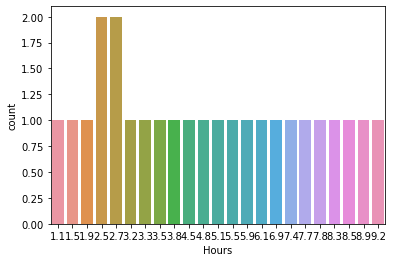

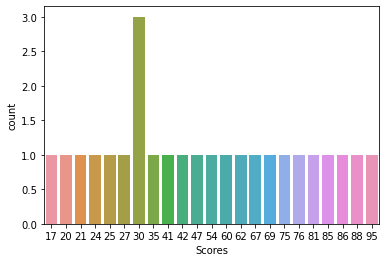

In [11]:
fig1 =sns.countplot(data.Hours)

plt.show(fig1)
fig2 =sns.countplot(data.Scores)
plt.show(fig2)

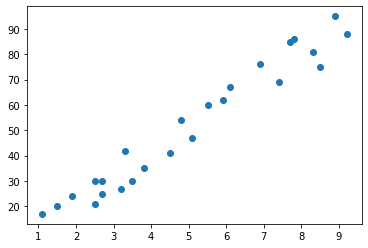

In [12]:
plt.scatter(data.Hours,data.Scores)

In [13]:
data['Hours'].corr(data['Scores'])

0.9761906560220887

<AxesSubplot:>

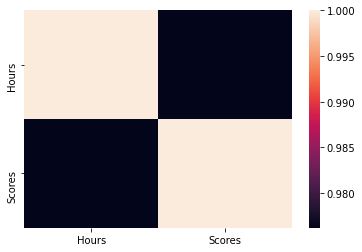

In [14]:
data_corr = data.corr()
sns.heatmap(data_corr)

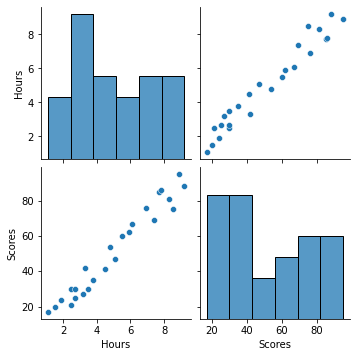

In [15]:
sns.pairplot(data)

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

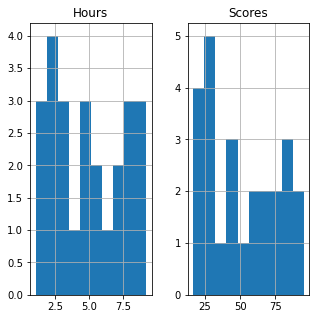

In [16]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
data.hist(ax = ax)

<h2>3.Outlier Checking</h2>

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


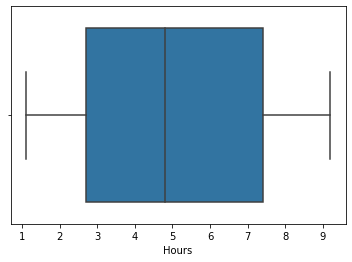

In [20]:
sns.boxplot(data.Hours)
outliers = data[(data['Hours'] <25.0)] 
outliers

<h3>There are  no outliers</h3>

<h2>4.Train Test Split</h2>

In [28]:
X = data.Hours
y = data.Scores
X= X.values.reshape(-1,1)

In [29]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
#test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 17 samples in the training set and 8 samples in the test set


<AxesSubplot:title={'center':'Relationship between X_train and Y_train variables and the best-fit line'}, xlabel='X_train', ylabel='Scores'>

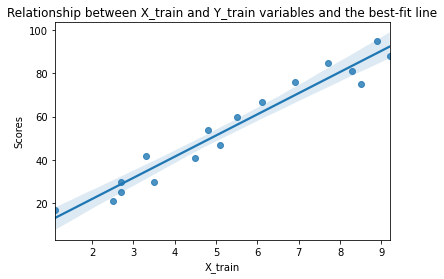

In [30]:
import seaborn as sns

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Relationship between X_train and Y_train variables and the best-fit line')

sns.regplot(X_train, y_train)

<h2>5.Applying Linear Regression</h2>

In [32]:
from sklearn.linear_model import LinearRegression
# fit the model on the train dataset

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
Y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error
print(f'MSE on the validation set: {mean_squared_error(y_test, Y_pred)}')

MSE on the validation set: 22.965097212700428


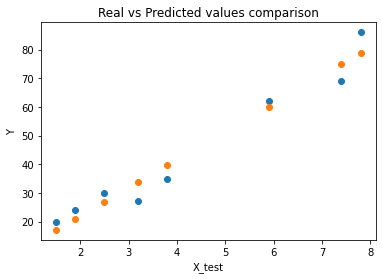

In [35]:
plt.xlabel('X_test')
plt.ylabel('Y')
plt.title('Real vs Predicted values comparison')

plt.scatter(X_test, y_test)
plt.scatter(X_test, Y_pred)

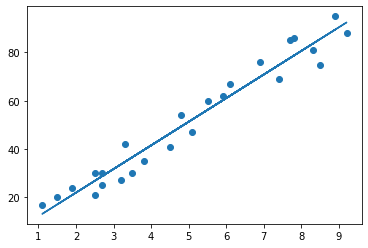

In [36]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

<h2>6.Making Predictions</h2>

In [38]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


<h2>7.Evaluating the Model Performance</h2>

In [37]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, Y_pred))

Mean Absolute Error: 4.419727808027651
